In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/new/Project')

In [5]:
df=pd.read_csv("udupi_visu.csv")

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,Location,Day,month,dayhalf,age,First F,First M,Female count,Male count,Gender,crimetype
0,Manipal,2.0,6.0,0.0,30.0,1,0,2,0,1,Other case
1,Udupi,1.0,8.0,1.0,39.0,1,0,1,0,1,Accident case
2,Karkala,1.0,8.0,0.0,39.0,1,0,4,2,1,Theft case
3,Karkala,1.0,8.0,1.0,1.0,0,0,4,1,2,Theft case
4,Udupi,6.0,8.0,0.0,45.0,0,1,2,1,0,Other case


In [8]:
df.columns

Index(['Location', 'Day', 'month', 'dayhalf', 'age', 'First F', 'First M',
       'Female count', 'Male count', 'Gender', 'crimetype'],
      dtype='object')

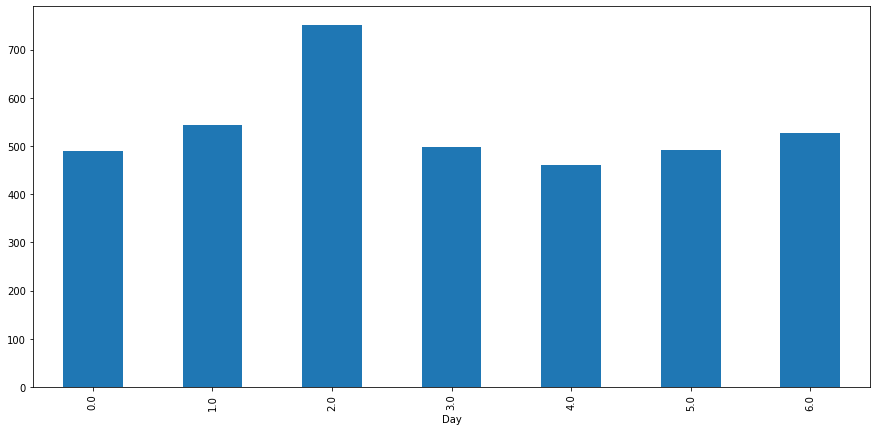

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Day']).count()['crimetype'].plot(kind='bar',ax=ax)

In [49]:
len(df)

3761

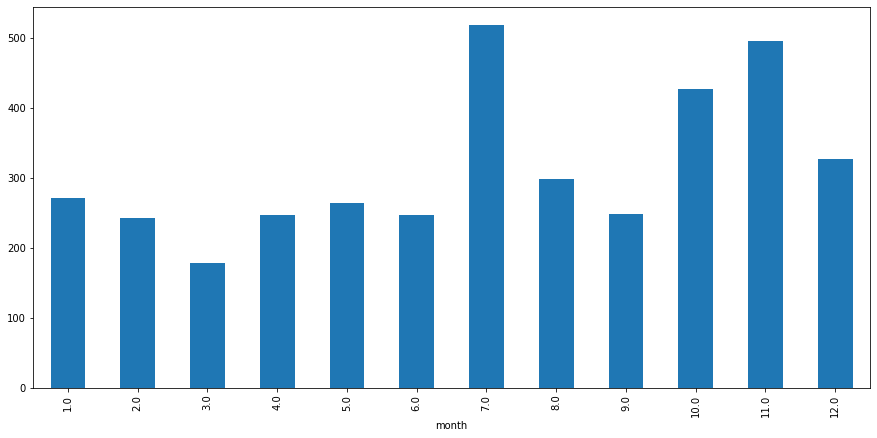

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['month']).count()['crimetype'].plot(kind='bar',ax=ax)

In [11]:
df.groupby(['Day','crimetype']).count()['month']

Day  crimetype           
0.0  Accident case           243
     Fraud case                7
     Jugari case              34
     Missing case              9
     Other case              140
     Theft case               33
     Use of drugs case        18
     Violence Act in case      5
1.0  Accident case           263
     Fraud case                8
     Jugari case              43
     Missing case             20
     Other case              152
     Theft case               34
     Use of drugs case         7
     Violence Act in case     17
2.0  Accident case           331
     Fraud case               30
     Jugari case              24
     Missing case             23
     Other case              265
     Theft case               53
     Use of drugs case         6
     Violence Act in case     20
3.0  Accident case           219
     Fraud case                7
     Jugari case              22
     Missing case             15
     Other case              174
     Theft case  

In [12]:
df.groupby(['month','crimetype']).count()['Day']

month  crimetype           
1.0    Accident case           160
       Fraud case                2
       Jugari case               7
       Missing case              9
       Other case               62
                              ... 
12.0   Missing case             11
       Other case               74
       Theft case               24
       Use of drugs case         1
       Violence Act in case     11
Name: Day, Length: 88, dtype: int64

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

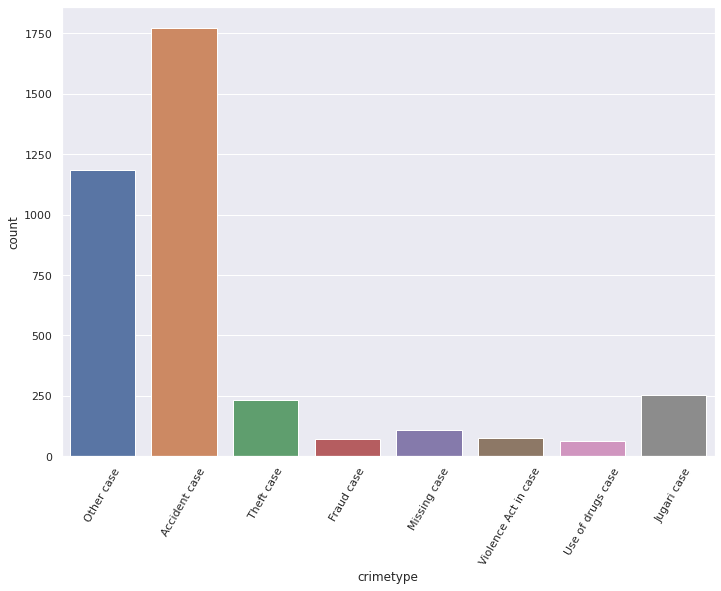

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='crimetype', data=df)
plt.xticks(rotation=60)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


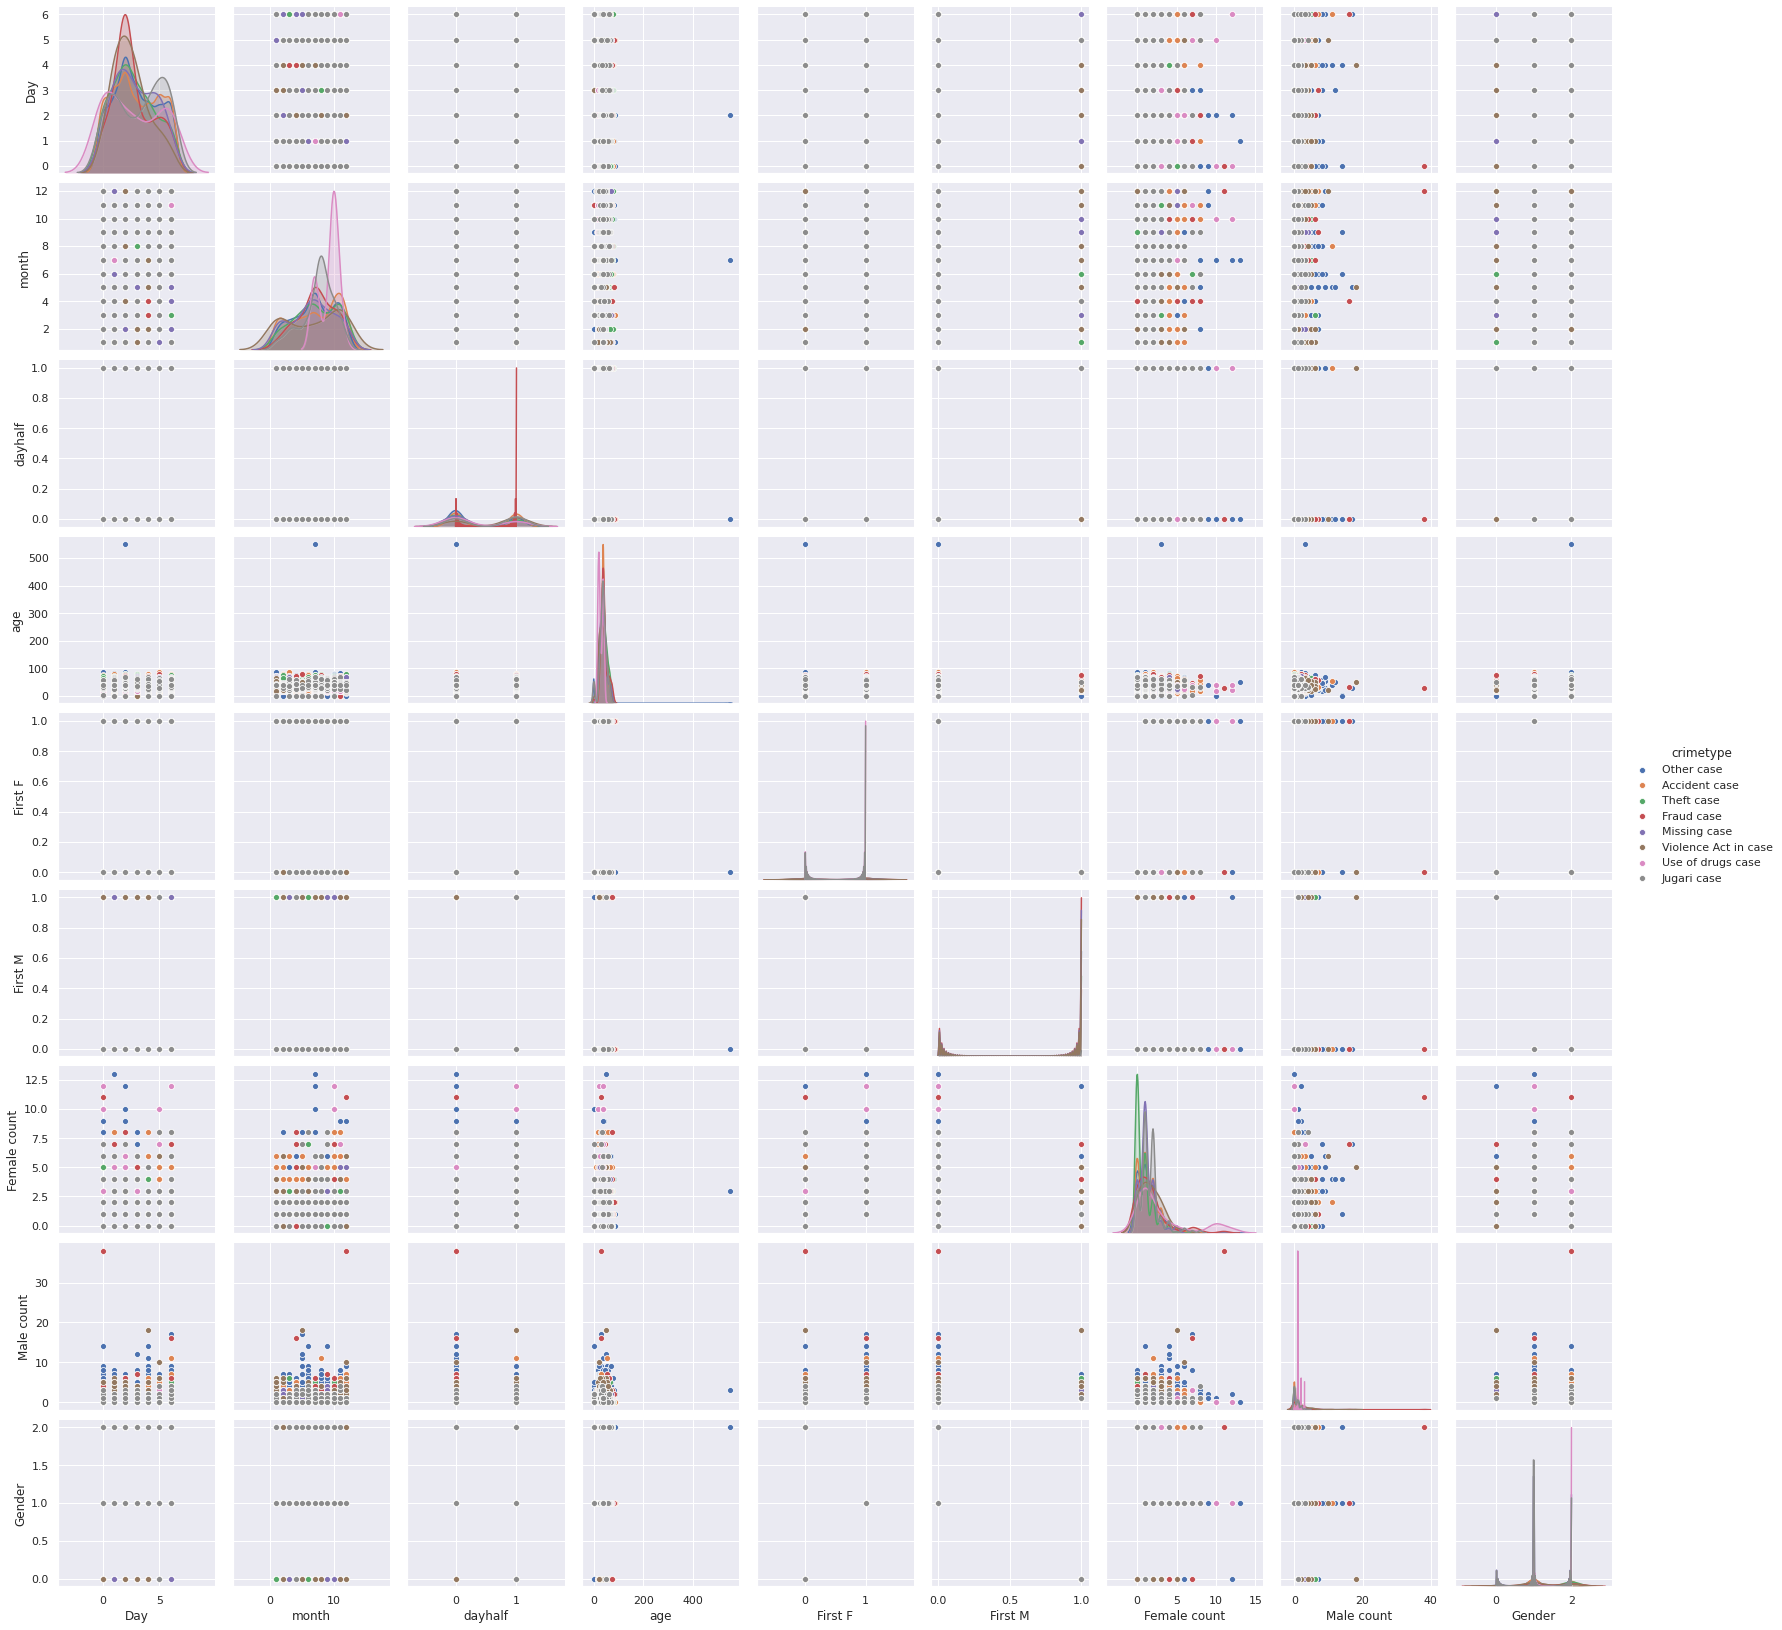

In [15]:
sns.pairplot(data=df, hue='crimetype')

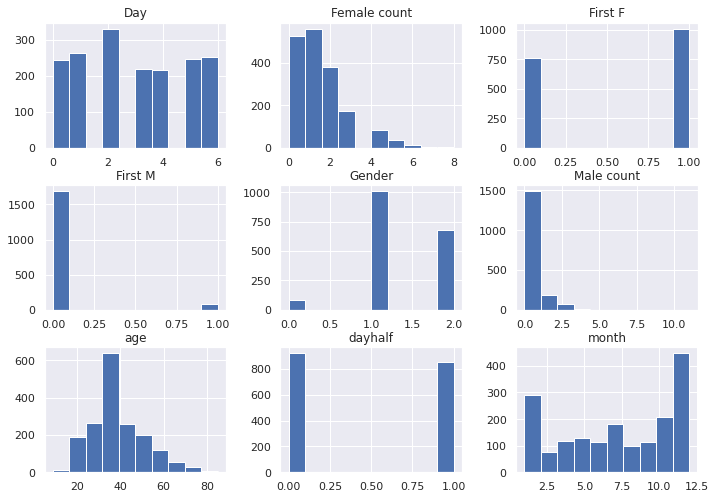

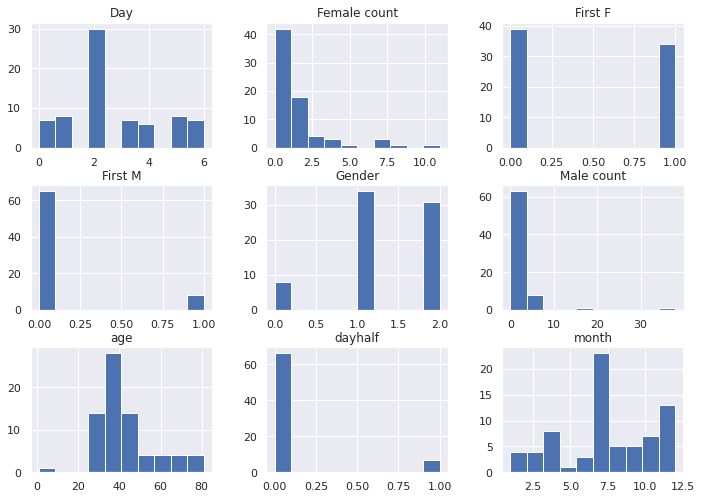

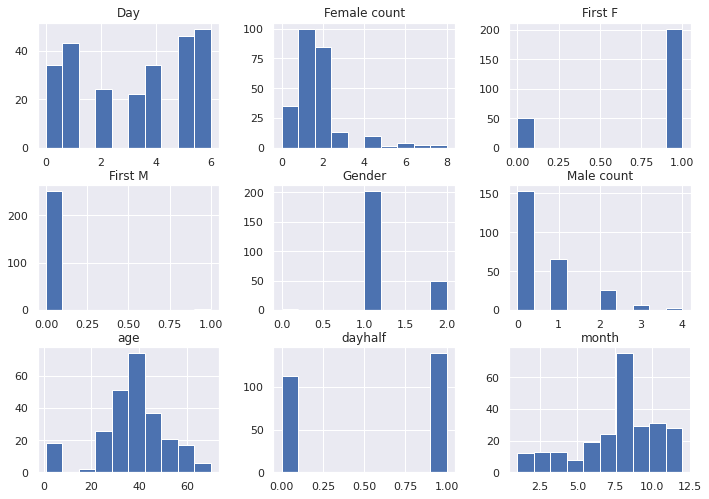

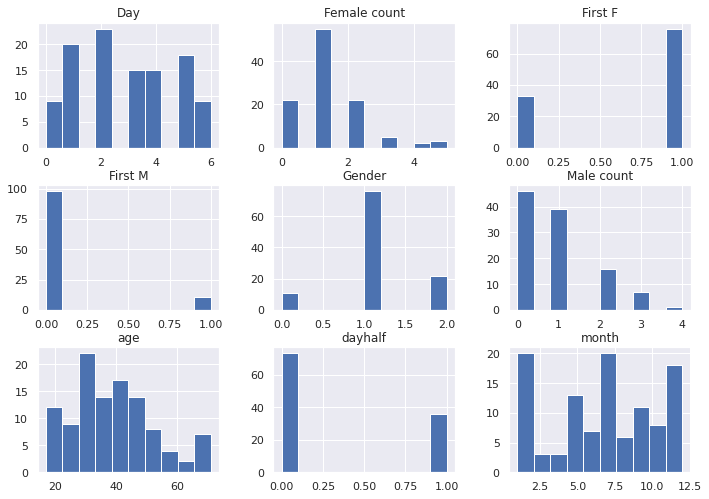

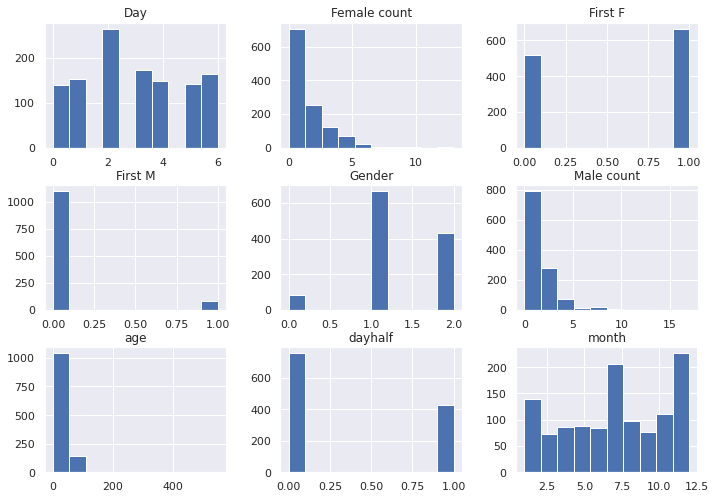

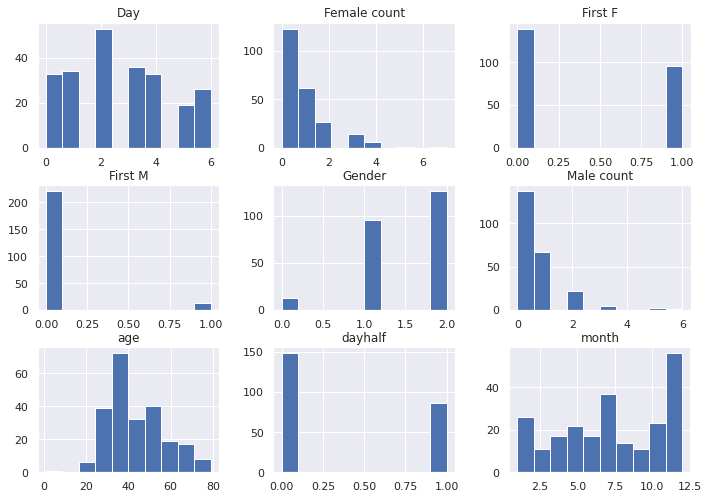

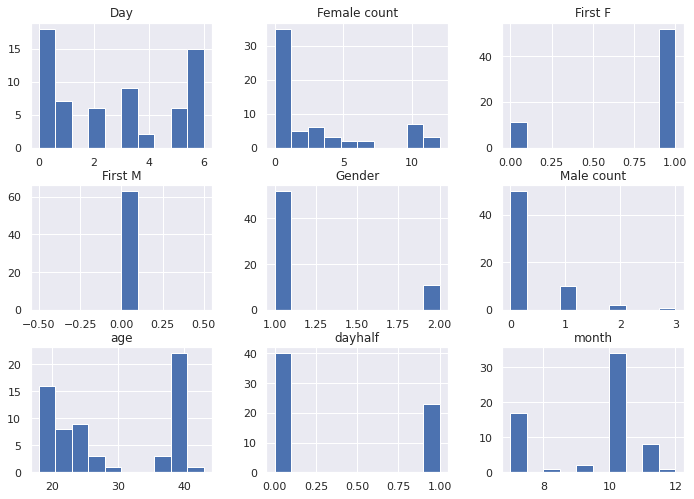

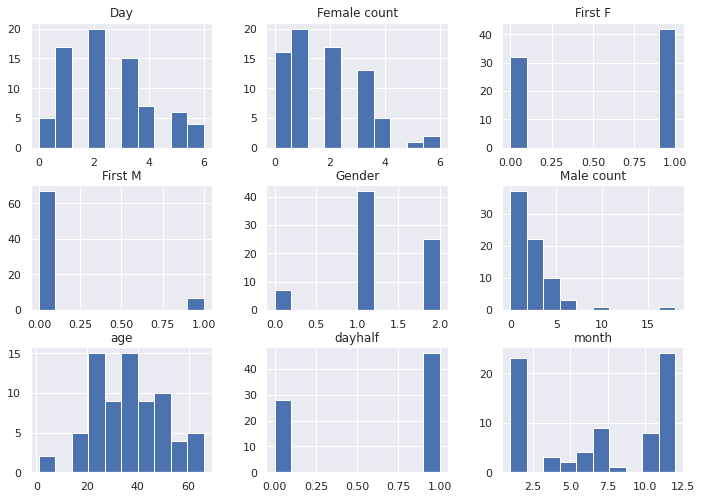

In [16]:
df.groupby("crimetype").hist()
plt.show()

In [17]:
k=df.groupby(['Location','crimetype'])['Day'].count()

In [18]:
df['crimetype'].value_counts()

Accident case           1772
Other case              1184
Jugari case              252
Theft case               234
Missing case             109
Violence Act in case      74
Fraud case                73
Use of drugs case         63
Name: crimetype, dtype: int64

In [19]:
df.columns

Index(['Location', 'Day', 'month', 'dayhalf', 'age', 'First F', 'First M',
       'Female count', 'Male count', 'Gender', 'crimetype'],
      dtype='object')

In [20]:
df['Location'].unique()

array(['Manipal', 'Udupi', 'Karkala', 'Kundapur', 'Ajekar', 'Byndoor',
       'Kota', 'Amasebailu', 'Hebri', 'Hiriyadka', 'Shankaranarayana',
       'Sirva', 'Kollur', 'Brahmavara', 'Kaapu', 'Malpe'], dtype=object)

Replacing City name with nearby taluk

In [21]:
df['Location'].replace(["Manipal","Hebri","Hiriyadka","Kota","Malpe"],"Udupi",inplace=True)
df['Location'].replace("Ajekar","Karkala",inplace=True)
df['Location'].replace("Sirva","Kaapu",inplace=True)
df['Location'].replace(["Shankaranarayana","Brahmavara","Amasebailu"],"Kundapur",inplace=True)
df["Location"].replace("Kollur","Byndoor",inplace=True)

In [22]:
df['Location'].unique()

array(['Udupi', 'Karkala', 'Kundapur', 'Byndoor', 'Kaapu'], dtype=object)

In [23]:
df['Location'].replace("Karkala","Karkal",inplace=True)
df['Location'].replace("Kaapu","Kapu",inplace=True)

In [24]:
k=df['Location'].value_counts()

In [25]:
ls

Building_model.ipynb       India_Assembly.prj  map/
crime_visualization.ipynb  India_Assembly.shp  udupi.csv
India_Assembly.dbf         India_Assembly.shx  udupi_visu.csv


In [26]:
!pip install geopandas 
!pip install plotly

     |████████████████████████████████| 931kB 7.7MB/s 
     |████████████████████████████████| 10.9MB 12.8MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


In [27]:
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [28]:
import geopandas as gpd

In [29]:
map=gpd.read_file("India_Assembly.shp")

In [30]:
map.head()

,objectid,st_code,st_name,dt_code,dist_name,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry
0,1,13,NAGALAND,1,MON,41,Tizit,1,NAGALAND,1301,Pre delimitation,1.38185405314,0.05584479387,"POLYGON ((94.94575 26.93518, 94.95510 26.93975..."
1,1,13,NAGALAND,1,MON,43,Tapi,1,NAGALAND,1301,Pre delimitation,1.05615692627,0.03038727861,"POLYGON ((95.22324 26.75964, 95.21760 26.75589..."
2,1,13,NAGALAND,1,MON,42,Wakching,1,NAGALAND,1301,Pre delimitation,0.98030324467,0.01882835726,"POLYGON ((94.86775 26.82831, 94.87219 26.82334..."
3,1,13,NAGALAND,2,TUENSANG,49,Tamlu,1,NAGALAND,1301,Pre delimitation,1.13329626994,0.02189855907,"POLYGON ((94.73863 26.76868, 94.74029 26.77594..."
4,1,13,NAGALAND,3,MOKOKCHUNG,21,Tuli,1,NAGALAND,1301,Pre delimitation,0.96598888462,0.02239653004,"POLYGON ((94.73863 26.76868, 94.73627 26.74956..."


In [31]:
map1=map[map['dist_name']=='UDUPI *']

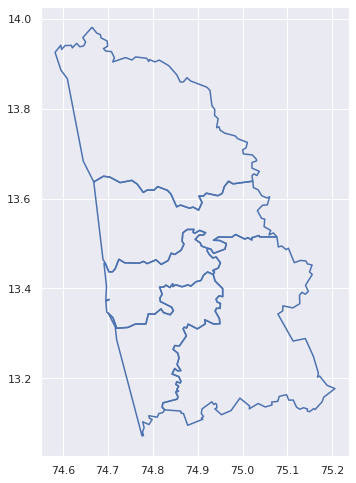

In [32]:
map1.boundary.plot()

In [33]:
df['Location'].value_counts()

Udupi       1950
Kundapur     885
Byndoor      420
Karkal       381
Kapu         125
Name: Location, dtype: int64

In [34]:
k=[420,885,1950,381,125]

In [35]:
map1

,objectid,st_code,st_name,dt_code,dist_name,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry
2364,14,29,KARNATAKA,16,UDUPI *,118,Byndoor,14,SHIMOGA,2914,None,1.6116454833,0.09849476403,"POLYGON ((74.66508 13.98135, 74.67546 13.96837..."
2382,15,29,KARNATAKA,16,UDUPI *,119,Kundapura,15,UDUPI CHIKMAGALUR,2915,None,1.4896665626,0.05009356205,"POLYGON ((74.66895 13.63688, 74.69047 13.64961..."
2388,15,29,KARNATAKA,16,UDUPI *,120,Udupi,15,UDUPI CHIKMAGALUR,2915,None,1.03814281897,0.02578447657,"POLYGON ((74.92344 13.48875, 74.92080 13.48439..."
2390,15,29,KARNATAKA,16,UDUPI *,122,Karkal,15,UDUPI CHIKMAGALUR,2915,None,1.99114823923,0.08934357582999999,"POLYGON ((75.07656 13.51462, 75.07979 13.49216..."
2398,15,29,KARNATAKA,16,UDUPI *,121,Kapu,15,UDUPI CHIKMAGALUR,2915,None,1.37255470041,0.03637667169,"POLYGON ((74.94766 13.38344, 74.94111 13.37585..."


In [36]:
map1['Total_crime']=k

In [37]:
map1

,objectid,st_code,st_name,dt_code,dist_name,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry,Total_crime
2364,14,29,KARNATAKA,16,UDUPI *,118,Byndoor,14,SHIMOGA,2914,None,1.6116454833,0.09849476403,"POLYGON ((74.66508 13.98135, 74.67546 13.96837...",420
2382,15,29,KARNATAKA,16,UDUPI *,119,Kundapura,15,UDUPI CHIKMAGALUR,2915,None,1.4896665626,0.05009356205,"POLYGON ((74.66895 13.63688, 74.69047 13.64961...",885
2388,15,29,KARNATAKA,16,UDUPI *,120,Udupi,15,UDUPI CHIKMAGALUR,2915,None,1.03814281897,0.02578447657,"POLYGON ((74.92344 13.48875, 74.92080 13.48439...",1950
2390,15,29,KARNATAKA,16,UDUPI *,122,Karkal,15,UDUPI CHIKMAGALUR,2915,None,1.99114823923,0.08934357582999999,"POLYGON ((75.07656 13.51462, 75.07979 13.49216...",381
2398,15,29,KARNATAKA,16,UDUPI *,121,Kapu,15,UDUPI CHIKMAGALUR,2915,None,1.37255470041,0.03637667169,"POLYGON ((74.94766 13.38344, 74.94111 13.37585...",125


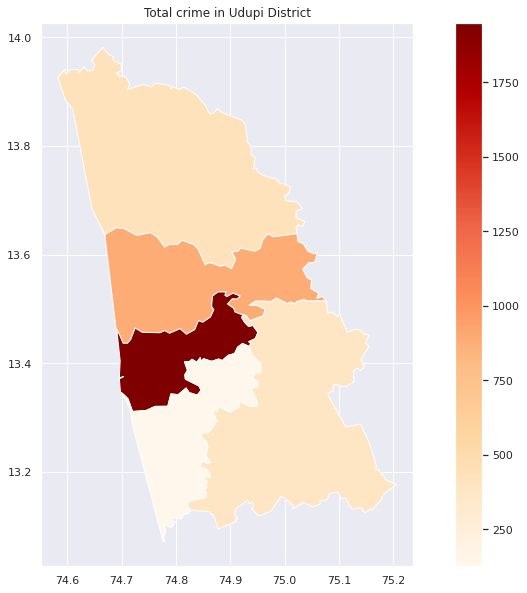

In [38]:
map1.plot(column='Total_crime', cmap='OrRd',figsize=(15,10),legend=True)
plt.title("Total crime in Udupi District")
plt.show()

# Accident Case

In [50]:
df[df['crimetype']=="Accident case"]["Location"].value_counts()

Udupi       899
Kundapur    417
Karkal      201
Byndoor     201
Kapu         54
Name: Location, dtype: int64

In [51]:
k=[201,417,899,201,54]

In [52]:
map1['Accident']=k

In [53]:
map1

,objectid,st_code,st_name,dt_code,dist_name,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry,Total_crime,Accident,Theft case
2364,14,29,KARNATAKA,16,UDUPI *,118,Byndoor,14,SHIMOGA,2914,None,1.6116454833,0.09849476403,"POLYGON ((74.66508 13.98135, 74.67546 13.96837...",420,201,15
2382,15,29,KARNATAKA,16,UDUPI *,119,Kundapura,15,UDUPI CHIKMAGALUR,2915,None,1.4896665626,0.05009356205,"POLYGON ((74.66895 13.63688, 74.69047 13.64961...",885,417,52
2388,15,29,KARNATAKA,16,UDUPI *,120,Udupi,15,UDUPI CHIKMAGALUR,2915,None,1.03814281897,0.02578447657,"POLYGON ((74.92344 13.48875, 74.92080 13.48439...",1950,899,121
2390,15,29,KARNATAKA,16,UDUPI *,122,Karkal,15,UDUPI CHIKMAGALUR,2915,None,1.99114823923,0.08934357582999999,"POLYGON ((75.07656 13.51462, 75.07979 13.49216...",381,201,37
2398,15,29,KARNATAKA,16,UDUPI *,121,Kapu,15,UDUPI CHIKMAGALUR,2915,None,1.37255470041,0.03637667169,"POLYGON ((74.94766 13.38344, 74.94111 13.37585...",125,54,9


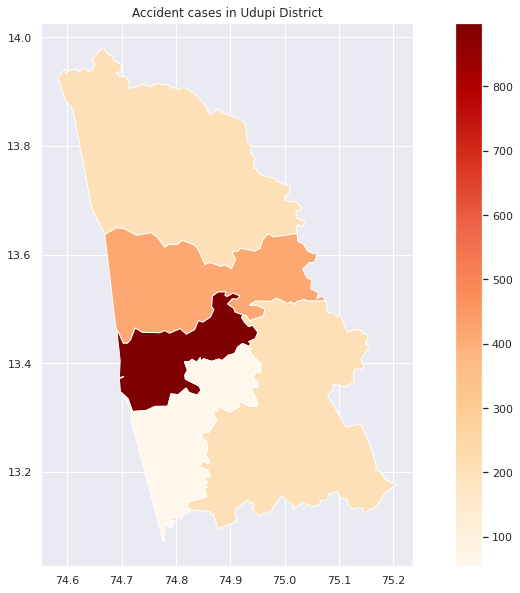

In [54]:
map1.plot(column='Accident', cmap='OrRd',figsize=(15,10),legend=True)
plt.title("Accident cases in Udupi District")
plt.show()

# Theft Case

In [44]:
df['crimetype'].unique()

array(['Other case', 'Accident case', 'Theft case', 'Fraud case',
       'Missing case', 'Violence Act in case', 'Use of drugs case',
       'Jugari case'], dtype=object)

In [45]:
df[df['crimetype']=="Theft case"]["Location"].value_counts()

Udupi       121
Kundapur     52
Karkal       37
Byndoor      15
Kapu          9
Name: Location, dtype: int64

In [46]:
k=[15,52,121,37,9]

In [47]:
map1["Theft case"]=k

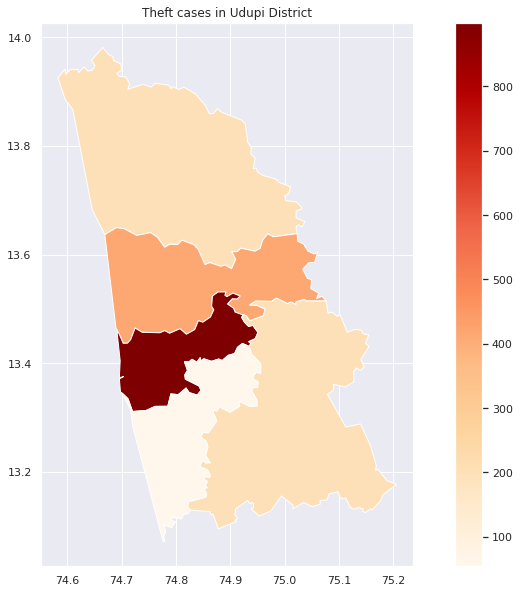

In [48]:
map1.plot(column='Accident', cmap='OrRd',figsize=(15,10),legend=True)
plt.title("Theft cases in Udupi District")
plt.show()